In [2]:
from split_dataset import SplitDataset
from extract_image import ExtractImage
import os

In [3]:
#PARENT DIRECTORY
PARENT_DIRECTORY = os.getcwd()
#PATH DATASET FOLDER TRAIN, TEST AND DEV SIGN LANGUAGE
SPLIT_DATASET_PATH = os.path.join(PARENT_DIRECTORY,'split-dataset')
EXTRACTED_IMAGE_PATH = os.path.join(PARENT_DIRECTORY , 'dataset/extracted-images')


In [4]:
# CHECK IF THE SPLIT DATASET FOLDER NOT EXITS OR NOT HAVE DIR
if not os.path.exists(SPLIT_DATASET_PATH) or not os.path.isdir(SPLIT_DATASET_PATH):
    #GENERATE TRAIN, TEST AND DEV DATASET
    SplitDataset()

In [5]:
TRAIN_DATASET = os.path.join(SPLIT_DATASET_PATH, 'train')
TEST_DATASET  = os.path.join(SPLIT_DATASET_PATH, 'test')
DEV_DATASET   = os.path.join(SPLIT_DATASET_PATH, 'dev')

print(f"Total folder videos for training: {len(TRAIN_DATASET)}")
print(f"Total folder videos for testing: {len(TEST_DATASET)}")
print(f"Total folder videos for dev: {len(DEV_DATASET)}")

Total folder videos for training: 65
Total folder videos for testing: 64
Total folder videos for dev: 63


In [6]:
#Create Labeling Data
class_labels = sorted(os.listdir(TRAIN_DATASET))
count_labels = len(class_labels)
print("Label : " + str(class_labels))
print("Total : " + str(count_labels))

Label : ['1', '10', '100', '1000', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '3', '30', '4', '40', '5', '50', '6', '60', '7', '70', '8', '80', '9', '90', 'abadi', 'abuabu', 'adil', 'agresif', 'agung', 'ahli', 'akrab', 'aktif', 'amal', 'amanah', 'asli', 'awet', 'ayo', 'ayu', 'bangga', 'bebas', 'berani', 'bersih', 'biliun', 'biru', 'cantik', 'coklat', 'hijau', 'hitam', 'juta', 'jutaan', 'kuning', 'miliyar', 'orange', 'puluh', 'puluhan', 'ratus', 'ratusan', 'ribuan', 'satuan', 'triliun']
Total : 65


In [22]:
from keras.preprocessing.image import ImageDataGenerator
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

batch_size = 32
# target_size = (128,128)
# target_size = (256,256)
# target_size = (512,512)
target_size = (720,512)
train_datagen = ImageDataGenerator(rescale=1./255,
                                   zoom_range=0.1,
                                   horizontal_flip=False,
                                   validation_split=0.2)

train_gen = train_datagen.flow_from_directory(TRAIN_DATASET, target_size=target_size,
                                             shuffle=True,
                                             batch_size= batch_size,
                                             color_mode='rgb',
                                             class_mode='categorical',
                                             subset='training')

val_gen = train_datagen.flow_from_directory(TRAIN_DATASET, target_size=target_size,
                                             batch_size= batch_size,
                                             color_mode='rgb',
                                             class_mode='categorical',
                                             subset='validation')


Found 40571 images belonging to 65 classes.
Found 10106 images belonging to 65 classes.


In [23]:
epoch = 50
train_size = len(train_gen)
steps_per_epoch = 32
validation_steps = 9

(720, 512, 3)
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


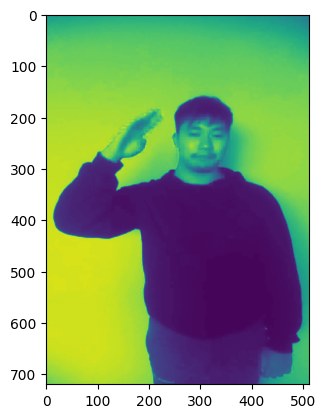

(720, 512, 3)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


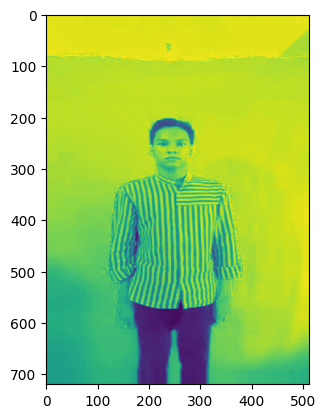

(720, 512, 3)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


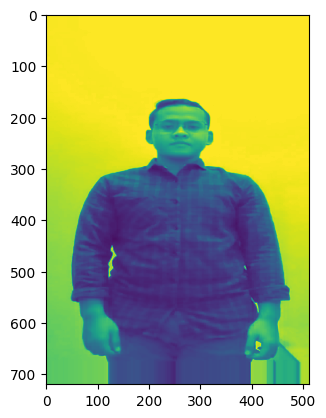

(720, 512, 3)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


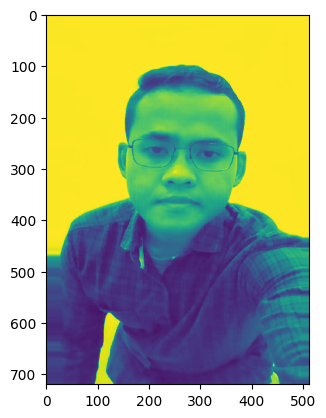

(720, 512, 3)
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


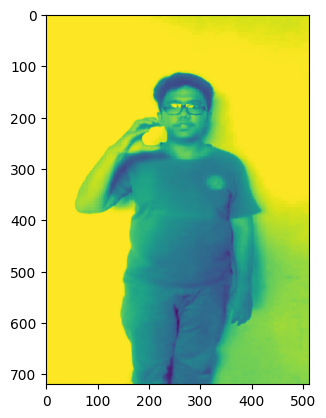

(720, 512, 3)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


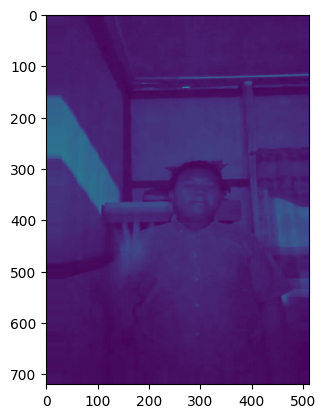

(720, 512, 3)
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


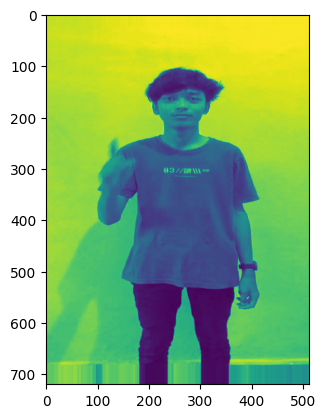

(720, 512, 3)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


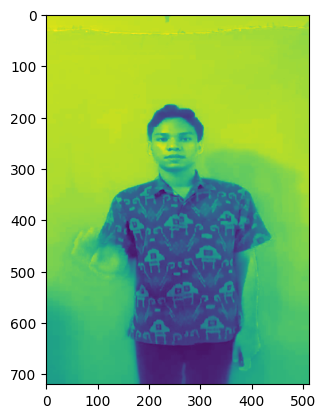

(720, 512, 3)
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


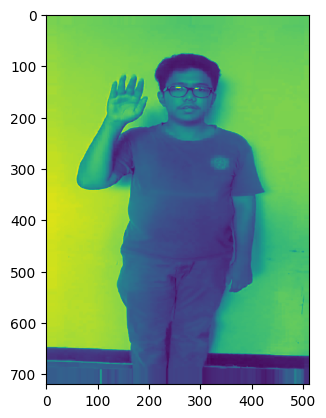

(720, 512, 3)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


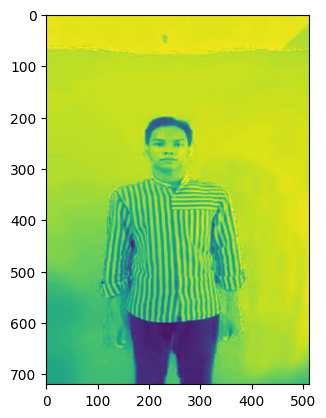

In [24]:
import matplotlib.pyplot as plt
x,y = train_gen.next()
#show 10 random images 
for i in range(0,10):
    image = x[i]
    label = y[i]
    print(x[i].shape)
    print (label)
    plt.imshow(image[:,:,0])
    plt.show()

In [10]:
# if not os.path.exists(EXTRACTED_IMAGE_PATH) or os.path.isdir(EXTRACTED_IMAGE_PATH):
#     #EXTRACT VIDEO TO IMAGE. TRAIN, TEST AND DEV DATASET
#     DATASET_PATH = [
#         TRAIN_DATASET,
#         TEST_DATASET,
#         DEV_DATASET
#     ]
    
#     EXTRATED_FOLDER_NAME = [
#         'train',
#         'test',
#         'dev'
#     ]

#     for index , datasetPath in enumerate(DATASET_PATH):
#         ExtractImage(saveFolderPath=EXTRACTED_IMAGE_PATH,folderName=EXTRATED_FOLDER_NAME[index],folderFiles=datasetPath)
    
#     print('completed extract image')